In [ ]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import time

In [ ]:
def f1(x):
    alpha=3
    beta=10
    return alpha*x[0]**2 + beta* x[1]**2
def grad_f1(x):
    alpha=3
    beta=10
    return 2*np.array([alpha * x[0],beta * x[1]])

In [ ]:
#Descente de gradient: 

In [ ]:
def DescenteDeGradient(f, grad_f, x0, step_size, rel_tol, n_iterations, return_iterates):
    i=0
    f_val=[]
    x_val= []
    t_val=[]
    start = time.perf_counter() 
    while (True):
        f_val.append(f(x0))
        x_val.append(x0)
        xi = x0 - step_size * grad_f(x0)
        if((LA.norm(xi-x0) / LA.norm(xi)) <= rel_tol):
            x0 = xi
            i += 1
            break 
        x0=xi
        i+=1
        if i >= n_iterations:
            break
    T = time.perf_counter() - start
    # Nombre d'itérations M = i
    M = i
    # Approximation du temps pour chaque itération
    t_val = [ (k / M) * T for k in range(M) ]
    if(return_iterates== True):
        return f_val , x_val , t_val
    else :
        return xi 

In [166]:
f_1, x_1,t_1 = DescenteDeGradient(f1, grad_f1, np.array([-1,1]), 0.01, 1e-6, 10000, True)

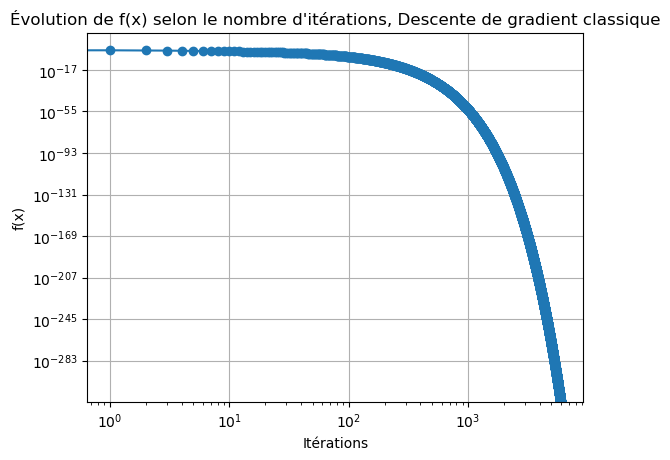

In [167]:
plt.plot(np.arange(len(f_1)),f_1, marker='o')
plt.xlabel("Itérations")
plt.ylabel("f(x)")
plt.yscale('log')
plt.xscale('log')
plt.title("Évolution de f(x) selon le nombre d'itérations, Descente de gradient classique")
plt.grid(True)
plt.show()

In [168]:
#descente de gradient pas optimal: 

In [169]:
def golden_optimal(f, a, b, eps, N ):
    iterations =0
    a_prime = a + (b-a)/ ((1+ np.sqrt(5))/2)**2
    b_prime = a + (b-a)/ ((1+ np.sqrt(5))/2)

    f_a_prime = f(a_prime)
    f_b_prime= f(b_prime)
    while(b-a > eps and iterations < N ):
        iterations+=1
        if(f_a_prime<f_b_prime):
            b=b_prime
            b_prime=a_prime
            f_b_prime=f_a_prime
            a_prime = a + (b-a)/ ((1+ np.sqrt(5))/2)**2
            f_a_prime=f(a_prime)
        elif (f_a_prime>f_b_prime):
            a=a_prime
            a_prime=b_prime
            f_a_prime=f_b_prime
            b_prime = a + (b-a)/ ((1+ np.sqrt(5))/2)
            f_b_prime=f(b_prime)
        else : 
            print("erreur")
    x_min = (a+b)/2
    return x_min, iterations


In [170]:
def gradient_descent_optimal_step(f, grad_f, x0, rel_tol, n_iterations, return_iterates):
    f_val = []
    x_val = []
    start = time.perf_counter()
    i = 0
    while True:
        g = grad_f(x0) 
        d = -g
        a, b = find_upper_bound(f, x0, d)
        phi = lambda alpha: f(x0 + alpha * d)
        alpha_opt, _ = golden_optimal(phi, a, b, rel_tol, n_iterations)
        xi = x0 + alpha_opt * d

        f_val.append(f(xi))
        x_val.append(xi.copy())

        denom = LA.norm(xi)
        if denom == 0:
            i += 1
            x0 = xi
            break

        if (LA.norm(xi - x0) / denom) <= rel_tol:
            i += 1
            x0 = xi
            break
        x0 = xi
        i += 1

        if i >= n_iterations:
            break

    T = time.perf_counter() - start

    M = i if i > 0 else 1   
    t_val = [(k / M) * T for k in range(M)]

    if return_iterates:
        return f_val, x_val, t_val
    else:
        return xi

In [171]:
f_2, x_2,t_2 = gradient_descent_optimal_step( f1 , grad_f1, np.array([-1.0, 1.0]),0.001, 100, True)

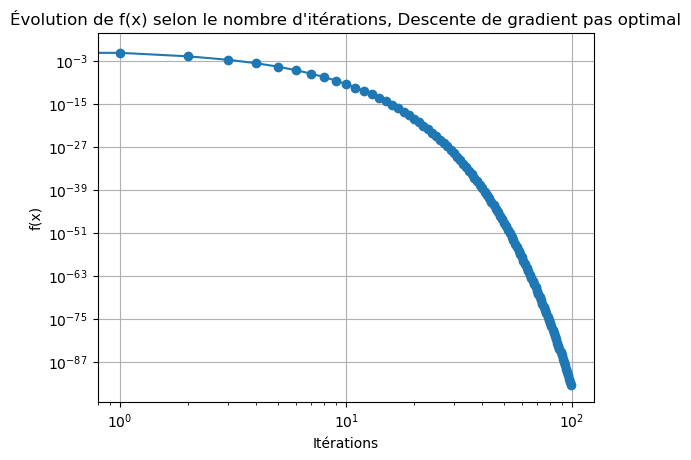

In [172]:
plt.plot(np.arange(len(f_2)),f_2, marker='o')
plt.xlabel("Itérations")
plt.ylabel("f(x)")
plt.yscale('log')
plt.xscale('log')
plt.title("Évolution de f(x) selon le nombre d'itérations, Descente de gradient pas optimal")
plt.grid(True)
plt.show()

In [173]:
#descente de gradient conjugé : 

In [174]:
#descente de gradient conjugé (lineaire): 

In [175]:
def grad_conj_lineaire(f,A, b, x0,eps,N=1000):
    r0=A@x0 -b
    p0= -r0
    i=0
    f_val=[]
    t_val = []
    start = time.perf_counter() 
    
    while(np.linalg.norm(r0) != 0 and i<N):
        alpha= np.linalg.norm(r0)**2 / (p0.T @ A @ p0)
        f_val.append(f(x0))
        x1 = x0 + alpha * p0
        r1 = r0 + alpha*A @ p0
        beta= np.linalg.norm(r1)**2 / np.linalg.norm(r0)**2
        p1= -r1 + beta * p0
        r0=r1
        p0=p1
        x0=x1
        i=i+1
    T = time.perf_counter() - start
    M = i
    # Approximation du temps pour chaque itération
    t_val = [ (k / M) * T for k in range(M) ]
    return x0 , f_val , t_val
        

In [176]:
#solution Ax=b
alpha=2
beta=5
A = np.array([[2*alpha , 0], [0 , 2*beta]])
b= np.array([0,0])

x_min3 , f_3 ,t_3 = grad_conj_lineaire(f1,A, b, np.array([-1,1]),0.001)
print("val min", x_min3)

val min [1.48306131e-167 5.55111512e-018]


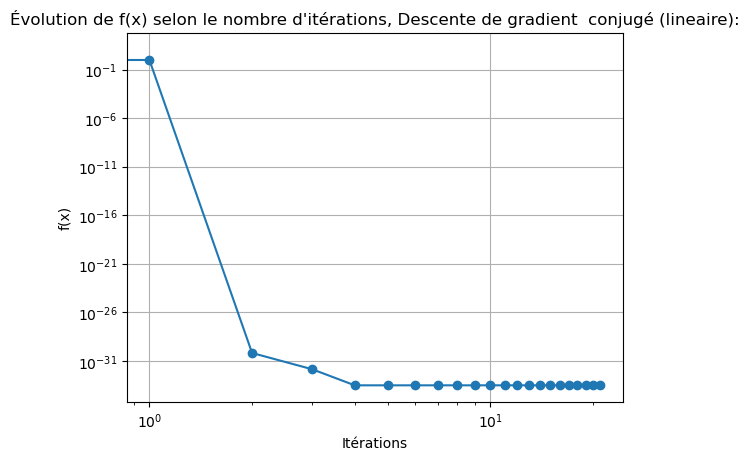

In [177]:
plt.plot(np.arange(len(f_3)),f_3, marker='o')
plt.xlabel("Itérations")
plt.ylabel("f(x)")
plt.yscale('log')
plt.xscale('log')
plt.title("Évolution de f(x) selon le nombre d'itérations, Descente de gradient  conjugé (lineaire):")
plt.grid(True)
plt.show()

In [178]:
#Descente de gradient conjuge non lineaire 

In [179]:
def golden_optimal(f, a, b, eps, N ):
    iterations =0
    a_prime = a + (b-a)/ ((1+ np.sqrt(5))/2)**2
    b_prime = a + (b-a)/ ((1+ np.sqrt(5))/2)

    f_a_prime = f(a_prime)
    f_b_prime= f(b_prime)
    while(b-a > eps and iterations < N ):
        iterations+=1
        if(f_a_prime<f_b_prime):
            b=b_prime
            b_prime=a_prime
            f_b_prime=f_a_prime
            a_prime = a + (b-a)/ ((1+ np.sqrt(5))/2)**2
            f_a_prime=f(a_prime)
        elif (f_a_prime>f_b_prime):
            a=a_prime
            a_prime=b_prime
            f_a_prime=f_b_prime
            b_prime = a + (b-a)/ ((1+ np.sqrt(5))/2)
            f_b_prime=f(b_prime)
        else : 
            print("erreur")
    x_min = (a+b)/2
    return x_min, iterations


In [180]:
def find_upper_bound(f, x, p, alpha_init=0.001):
    a = 0
    alpha_i = alpha_init
    alpha_0 = 0

    while f(x + alpha_i * p) < f(x + alpha_0 * p):
        alpha_0 = alpha_i       
        alpha_i *=2

    b = alpha_i
    return a, b

In [181]:
def gradient_conjuge(f, grad_f, x0, eps, N):
    p0= -grad_f(x0)
    i=0
    f_val=[]
    t_val = []
    start = time.perf_counter() 
    while (grad_f(x0).all() !=0 and i<N) :
        a, b = find_upper_bound(f, x0, p0)
        # Fonction φ(α) = f(x + α p)
        phi = lambda alpha: f(x0 + alpha * p0)
        # Calcul du pas optimal α* par la méthode du golden-section
        alpha_opt, _ = golden_optimal(phi, a, b, eps=eps, N=100)
        f_val.append(f(x0))
        x1= x0 + alpha_opt*p0
        beta= np.linalg.norm(grad_f(x1))**2 / np.linalg.norm(grad_f(x0))**2
        p1 = -grad_f(x1) + beta * p0
        i=i+1
        x0=x1
        p0=p1
    T = time.perf_counter() - start
    # Nombre d'itérations M = i
    M = i
    # Approximation du temps pour chaque itération
    t_val = [ (k / M) * T for k in range(M) ]
    return x0 , f_val , t_val 
        

In [182]:
x_min3 , f_4, t_4 = grad_conj(f1, grad_f1, np.array([-1.0, 1.0]), 0.01, 100)
print(x_min3)

[-5.64528696e-92  4.76334778e-93]


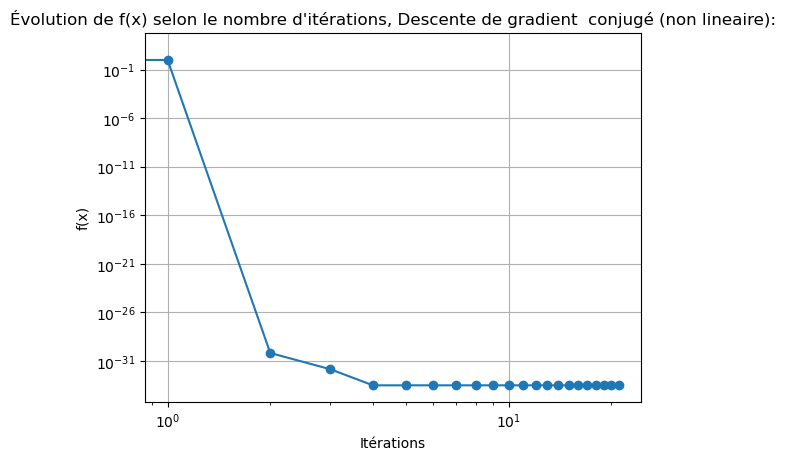

In [183]:
plt.plot(np.arange(len(f_3)),f_3, marker='o')
plt.xlabel("Itérations")
plt.ylabel("f(x)")
plt.yscale('log')
plt.xscale('log')
plt.title("Évolution de f(x) selon le nombre d'itérations, Descente de gradient  conjugé (non lineaire):")
plt.grid(True)
plt.show()

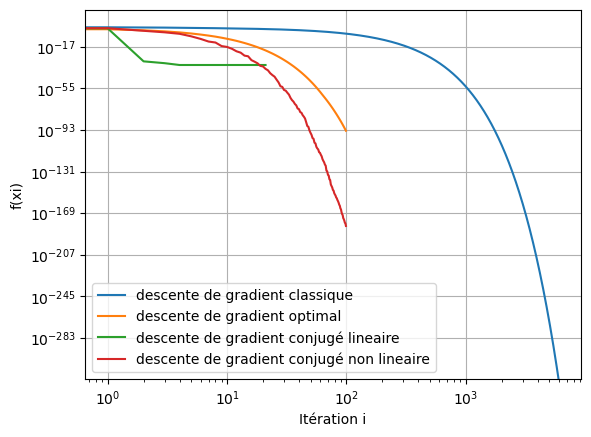

In [184]:
plt.plot(np.arange(len(f_1)),f_1, label="descente de gradient classique")
plt.plot(np.arange(len(f_2)),f_2, label="descente de gradient optimal")
plt.plot(np.arange(len(f_3)),f_3, label="descente de gradient conjugé lineaire")
plt.plot(np.arange(len(f_4)),f_4, label="descente de gradient conjugé non lineaire")


plt.xlabel("Itération i")
plt.ylabel("f(xi)")
plt.grid(True)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show() 

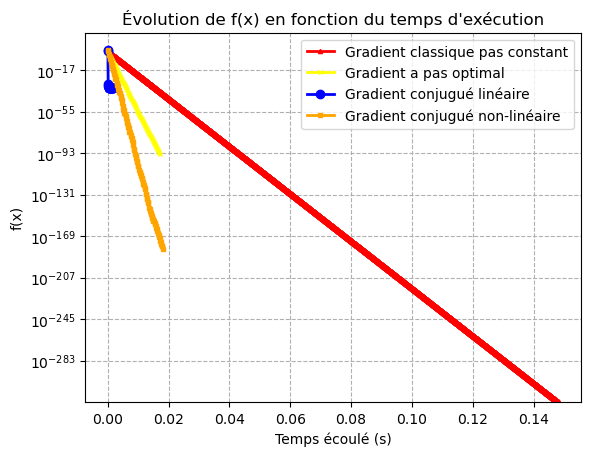

In [185]:
plt.plot(t_1, f_1, color='red', label="Gradient classique pas constant", marker='^', markersize=3, linewidth=2)
plt.plot(t_2, f_2, color='yellow', label="Gradient a pas optimal", marker='x', markersize=3, linewidth=2)
plt.plot(t_3, f_3, color='blue', label="Gradient conjugué linéaire", marker='o', markersize=6, linewidth=2)
plt.plot(t_4, f_4, color='orange', label="Gradient conjugué non-linéaire", marker='s', markersize=3, linewidth=2)

plt.xlabel("Temps écoulé (s)")
plt.ylabel("f(x)")
plt.yscale('log')
plt.title("Évolution de f(x) en fonction du temps d'exécution")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()
